In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [340]:
df1=pd.read_csv("G:/Hr analytics/train.csv") #train data
df2=pd.read_csv("G:/Hr analytics/test.csv")  #test data
sub=pd.read_csv("G:/Hr analytics/sample_submission.csv")  #sample submission file

In [341]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


<AxesSubplot:>

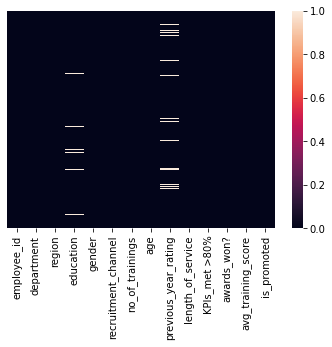

In [342]:
sns.heatmap(df1.isnull(), yticklabels=False )

<AxesSubplot:>

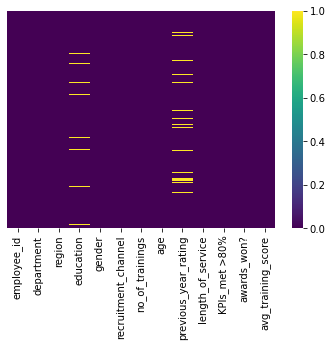

In [343]:
sns.heatmap(df2.isnull(), yticklabels=False ,cmap='viridis')

In [344]:
df2.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [345]:
df1['education'].fillna(df1['education'].mode()[0], inplace=True)
df2['education'].fillna(df2['education'].mode()[0], inplace=True)

In [346]:
df1['previous_year_rating'].fillna(df1['previous_year_rating'].mean(), inplace=True)
df2['previous_year_rating'].fillna(df2['previous_year_rating'].mean(), inplace=True)

In [347]:
df1.isnull().sum(), df2.isnull().sum()

(employee_id             0
 department              0
 region                  0
 education               0
 gender                  0
 recruitment_channel     0
 no_of_trainings         0
 age                     0
 previous_year_rating    0
 length_of_service       0
 KPIs_met >80%           0
 awards_won?             0
 avg_training_score      0
 is_promoted             0
 dtype: int64,
 employee_id             0
 department              0
 region                  0
 education               0
 gender                  0
 recruitment_channel     0
 no_of_trainings         0
 age                     0
 previous_year_rating    0
 length_of_service       0
 KPIs_met >80%           0
 awards_won?             0
 avg_training_score      0
 dtype: int64)

In [348]:
#we fixed the null vales now we will see the categorical variables

In [349]:
categorical_feature=[x for x in df1.columns if df1[x].dtype=='O']
categorical_feature2=[x for x in df2.columns if df2[x].dtype=='O']

In [350]:
for c in categorical_feature:
    print('\nFrequency of Categories for varible %s'%c)
    print(df1[c].value_counts())


Frequency of Categories for varible department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

Frequency of Categories for varible region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_

In [351]:
for c in categorical_feature2:
    print('/n frequency of each categorical feature %s'%c)
    print(df2[c].value_counts())

/n frequency of each categorical feature department
Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: department, dtype: int64
/n frequency of each categorical feature region
region_2     5299
region_22    2739
region_7     1982
region_13    1167
region_15    1130
region_26    1011
region_31     844
region_4      775
region_27     710
region_28     595
region_16     590
region_11     571
region_23     516
region_32     433
region_29     414
region_19     410
region_17     361
region_14     350
region_5      342
region_25     337
region_20     326
region_6      298
region_30     273
region_8      269
region_10     269
region_1      238
region_24     219
region_12     215
region_9      180
region_21     179
region_34     155
region_3      147
region_33     126
region_18      20
Name: region, dtype: in

In [352]:
df1.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004364,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.059804,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.005710,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004364,-0.059804,0.005710,1.000000,0.000239,0.338134,0.026669,0.072065,0.153406
length_of_service,0.001274,-0.057275,0.657111,0.000239,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.338134,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.026669,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.072065,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153406,-0.010670,0.221582,0.195871,0.181147,1.000000


<AxesSubplot:>

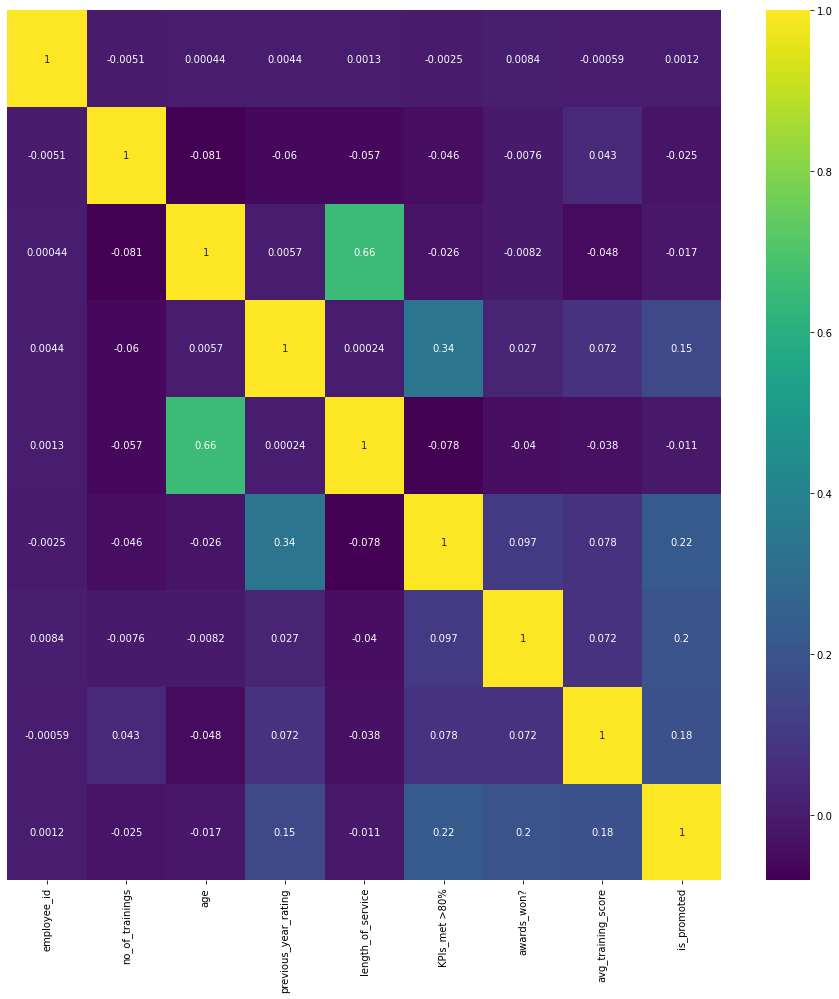

In [353]:
plt.figure(figsize = (16,16))
sns.heatmap(df1.corr(),yticklabels=False, annot=True, cmap='viridis')

<AxesSubplot:>

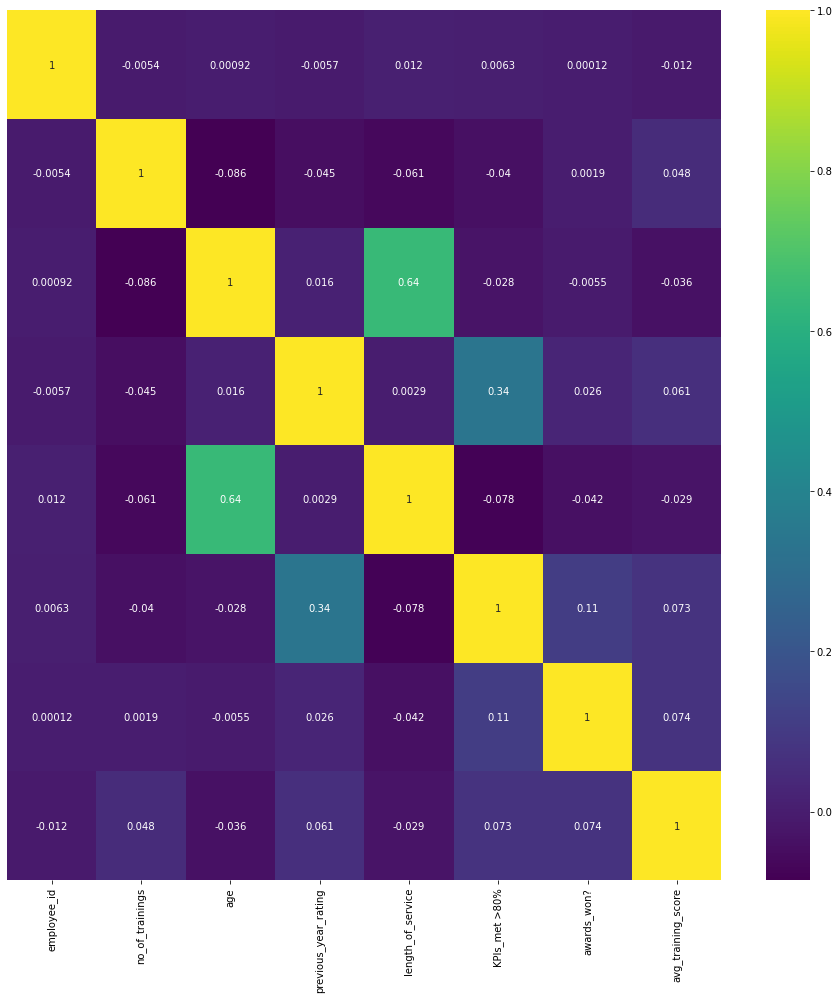

In [354]:
plt.figure(figsize = (16,16))
sns.heatmap(df2.corr(),yticklabels=False, annot=True, cmap='viridis')

In [355]:
df1['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [356]:
df2['gender'].replace({'m':1,'f':0}, inplace=True)

In [357]:
df1['gender'].replace({'m':1,'f':0}, inplace=True)

In [358]:
df1['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [359]:
df1['recruitment_channel'].replace({'other':2,'sourcing':1,'referred':0}, inplace=True)
df2['recruitment_channel'].replace({'other':2,'sourcing':1,'referred':0}, inplace=True)

In [360]:
df1.drop('employee_id',axis=1, inplace=True)
df2.drop('employee_id',axis=1, inplace=True)


In [361]:
df1['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [362]:
df1.dtypes

department               object
region                   object
education                object
gender                    int64
recruitment_channel       int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [363]:
df1['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [364]:
df1= pd.get_dummies(df1, columns=['department','region','education'])

In [365]:
df2= pd.get_dummies(df2, columns=['department','region','education'])

In [366]:
df1.shape

(54808, 56)

<AxesSubplot:>

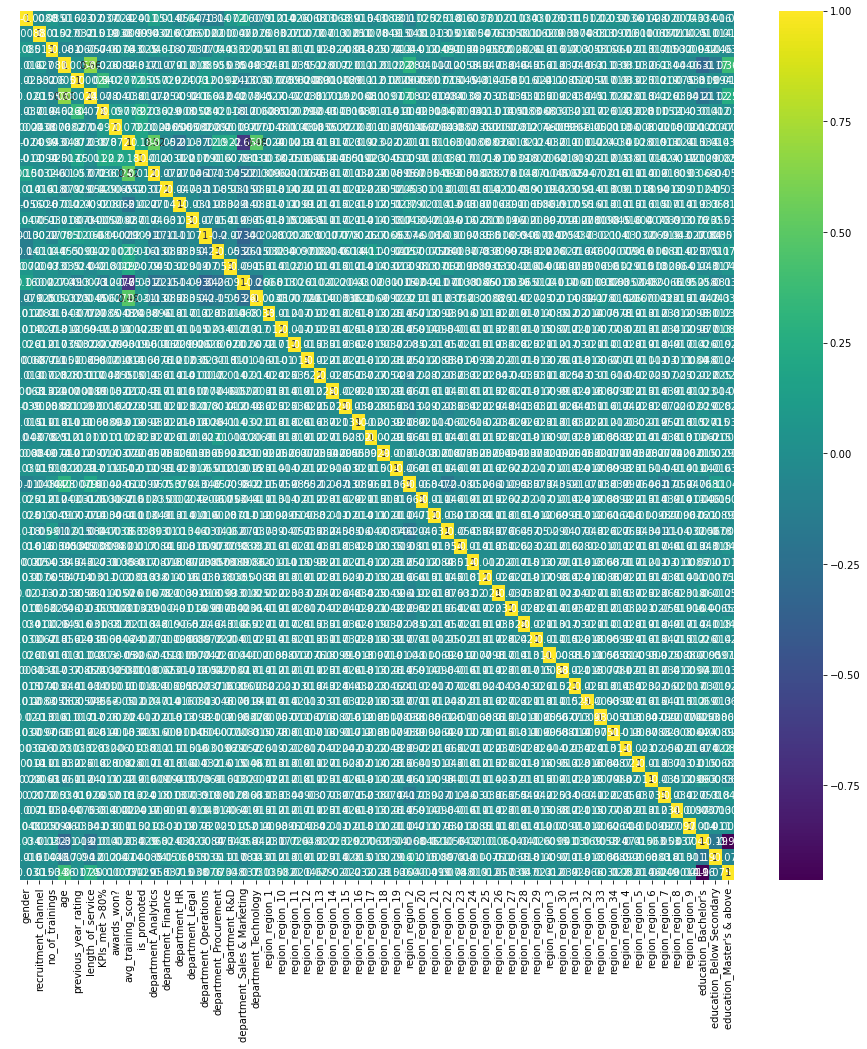

In [367]:
plt.figure(figsize = (16,16))
sns.heatmap(df1.corr(),yticklabels=False, annot=True, cmap='viridis')

In [368]:
#will remove constant values in the data

In [369]:
#it will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df1)

VarianceThreshold(threshold=0)

In [370]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [371]:
var_thres.fit(df2)

VarianceThreshold(threshold=0)

In [372]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [373]:
#as we can see no constant values

In [374]:
#we will take certain number of features to train and test data

In [375]:
#we selct the features based on correlation 

In [376]:
threshold=0.9

In [377]:
# find and remove correlated features
def correlation(df1, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df1.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [378]:
corr_featues=correlation(df1,threshold)

In [379]:
corr_featues

{"education_Master's & above"}

In [380]:
# find and remove correlated features
def correlation(df2, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df2.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [381]:
corr_featues2=correlation(df2,threshold)

In [382]:
corr_featues2

{"education_Master's & above"}

In [383]:
df1.head()

,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above
0,0,1,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,2,1,30,5.0,4,0,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,2,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,2,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [384]:
#we can drop above data colun since its collinarity itself

# We have multiple columns so we will selct best 20 or 30 best features for training the ML model

In [385]:
X=df1.drop('is_promoted',axis=1)
y=df1['is_promoted']

In [386]:
X

,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above
0,0,1,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,2,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,2,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,2,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,1,1,48,3.0,17,0,0,78,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
54804,0,2,1,37,2.0,6,0,0,56,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
54805,1,2,1,27,5.0,3,1,0,79,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
54806,1,1,1,29,1.0,2,0,0,45,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [387]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [402]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=14)

In [403]:
#mutual  classify library
#this library also helps us to find mutual information or correlated values between the variable(+ve number)
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)

In [404]:
mutual_info

array([0.00391369, 0.00613487, 0.00774624, 0.        , 0.01712751,
       0.00101703, 0.02373646, 0.0105122 , 0.03079293, 0.00039707,
       0.        , 0.        , 0.        , 0.00148416, 0.        ,
       0.        , 0.00142105, 0.00029514, 0.0021947 , 0.0006507 ,
       0.0007283 , 0.        , 0.00089856, 0.00025488, 0.00052362,
       0.00101975, 0.        , 0.        , 0.00049779, 0.        ,
       0.        , 0.00100449, 0.        , 0.        , 0.00096373,
       0.        , 0.00150832, 0.00032198, 0.        , 0.00042635,
       0.00205955, 0.00242731, 0.00057321, 0.        , 0.        ,
       0.        , 0.00020713, 0.        , 0.00205755, 0.        ,
       0.        , 0.00058815, 0.00565024, 0.        , 0.00145747])

In [405]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

avg_training_score              0.030793
KPIs_met >80%                   0.023736
previous_year_rating            0.017128
awards_won?                     0.010512
no_of_trainings                 0.007746
recruitment_channel             0.006135
education_Bachelor's            0.005650
gender                          0.003914
region_region_30                0.002427
region_region_1                 0.002195
region_region_3                 0.002060
region_region_6                 0.002058
region_region_26                0.001508
department_Operations           0.001484
education_Master's & above      0.001457
department_Sales & Marketing    0.001421
region_region_16                0.001020
length_of_service               0.001017
region_region_21                0.001004
region_region_24                0.000964
region_region_13                0.000899
region_region_11                0.000728
region_region_10                0.000651
region_region_9                 0.000588
region_region_31

<AxesSubplot:>

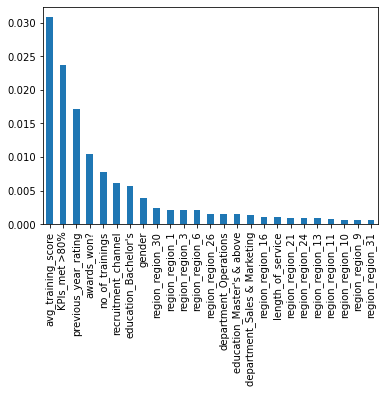

In [410]:
#lets plot in bar graph
mutual_data.nlargest(25).plot(kind='bar')

In [411]:
#to select best features use kbest

In [412]:
from sklearn.feature_selection import SelectKBest
best_features=SelectKBest(mutual_info_classif,k=20)
best_features=best_features.fit(X, y)
#X.columns[best_features.get_support()]

In [413]:
X.columns[best_features.get_support()]

Index(['gender', 'recruitment_channel', 'no_of_trainings',
       'previous_year_rating', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Legal', 'department_Operations',
       'region_region_11', 'region_region_13', 'region_region_2',
       'region_region_20', 'region_region_22', 'region_region_28',
       'region_region_3', 'region_region_32', 'education_Bachelor's',
       'education_Below Secondary', 'education_Master's & above'],
      dtype='object')

In [414]:
 X_new = SelectKBest(k=20).fit_transform(X, y)

In [415]:
 X_new.shape

(54808, 20)

In [416]:
y.shape

(54808,)

In [417]:
X_new=pd.DataFrame(X_new, columns=['gender', 'recruitment_channel', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'awards_won?',
       'department_HR', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'region_region_1', 'region_region_17',
       'region_region_26', 'region_region_32', 'region_region_4',
       'region_region_5', 'region_region_6', 'education_Bachelors',
       'education_Below Secondary'])

In [418]:
X_new.head()

,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,department_HR,department_Procurement,department_R&D,department_Sales & Marketing,region_region_1,region_region_17,region_region_26,region_region_32,region_region_4,region_region_5,region_region_6,education_Bachelors,education_Below Secondary
0,1.0,5.0,1.0,0.0,49.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,5.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,3.0,0.0,0.0,50.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,1.0,0.0,0.0,50.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,3.0,0.0,0.0,73.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [274]:
#will convert df2 data also

In [422]:
df2

,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above
0,1,1,1,24,3.339146,1,1,0,77,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,2,1,31,3.000000,5,0,0,51,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,2,1,31,1.000000,4,0,0,47,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,2,3,31,2.000000,9,0,0,65,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,1,30,4.000000,7,0,0,61,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,1,1,1,24,3.000000,1,0,0,61,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
23486,1,1,1,31,3.000000,7,0,0,74,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23487,0,1,1,26,4.000000,4,0,0,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23488,1,1,3,27,3.339146,1,0,0,70,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [424]:
df2=df2[['gender', 'recruitment_channel', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'awards_won?',
       'department_HR', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'region_region_1', 'region_region_17',
       'region_region_26', 'region_region_32', 'region_region_4',
       'region_region_5', 'region_region_6', 
       'education_Below Secondary','region_region_29']]

In [425]:
df2.head()

,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,department_HR,department_Procurement,department_R&D,department_Sales & Marketing,region_region_1,region_region_17,region_region_26,region_region_32,region_region_4,region_region_5,region_region_6,education_Below Secondary,region_region_29
0,1,1,1,24,3.339146,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,2,1,31,3.000000,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,2,1,31,1.000000,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,2,3,31,2.000000,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,30,4.000000,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [426]:
X=X_new

In [427]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=14)

In [428]:
#will apply logistic regressor ML model

Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial

In [429]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [430]:
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [431]:
accuracy_score_test=accuracy_score(y_test,y_pred)
accuracy_score_train=accuracy_score(y_train, y_pred_train)

In [432]:
accuracy_score_test

0.9194794137322873

In [433]:
accuracy_score_train

0.9198488205395543

In [434]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

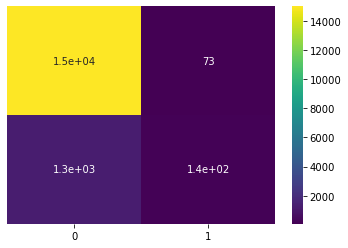

In [435]:
sns.heatmap(cfm,yticklabels=False,annot=True ,cmap='viridis')

<AxesSubplot:>

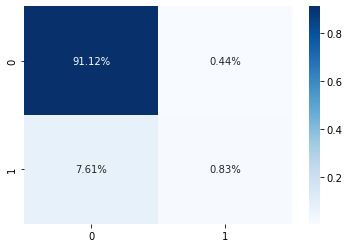

In [436]:
sns.heatmap(cfm/np.sum(cfm), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

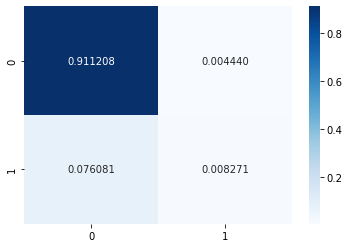

In [437]:
sns.heatmap(cfm/np.sum(cfm), annot=True, 
            fmt='1f', cmap='Blues')

In [438]:
from sklearn.metrics import f1_score

In [439]:
f1_score_test=f1_score(y_test,y_pred)
f1_score_train=f1_score(y_train, y_pred_train)

In [440]:
f1_score_test

0.17042606516290726

In [441]:
f1_score_train

0.18886837246109203

In [442]:
#will check the model by random forestclassifier

In [443]:
from sklearn.ensemble import RandomForestClassifier
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [444]:
y_pred=rf.predict(X_test)
y_pred_train=rf.predict(X_train)

In [445]:
accuracy_score_test=accuracy_score(y_test,y_pred)
accuracy_score_train=accuracy_score(y_train, y_pred_train)

In [446]:
accuracy_score_test

0.9250136836343733

In [447]:
accuracy_score_train

0.9534732177766193

In [448]:
cfm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

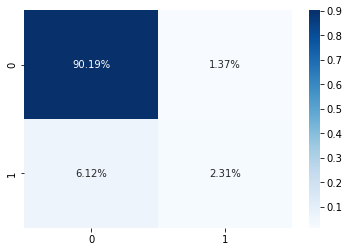

In [449]:
sns.heatmap(cfm/np.sum(cfm), annot=True, 
            fmt='.2%', cmap='Blues')

In [450]:
f1_score_test=f1_score(y_test,y_pred)
f1_score_train=f1_score(y_train, y_pred_train)

In [451]:
#now we will submit the data

In [452]:
y_pred3 = model.predict(df2)

In [456]:
sub.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [457]:
df=pd.DataFrame(y_pred3,columns=['is_promoted'])

In [459]:
sub['is_promoted']=df['is_promoted']
sub.head()

,employee_id,is_promoted
0,8724,1
1,74430,1
2,72255,1
3,38562,1
4,64486,1


In [461]:
sub.to_csv('G:/Hr analytics/submitted.csv',index=False)